In [15]:
import os
import numpy as np
from scipy import interpolate
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams as rc
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

In [16]:
rc['font.size'] = 15
rc['figure.figsize'] = (8,8)
rc['savefig.format'] = 'pdf'
rc['savefig.transparent'] = True
rc['savefig.bbox'] = 'tight'
rc['savefig.directory'] = os.chdir('.')

In [17]:
MCols =  {  # Metropolis theme colors in HTML
    'dBrown' : '604c38', 
    'dTeal'  : '23373b', 
    'lBrown' : 'EB811B',
    'alert'  : 'EB811B',
    'example': '14B03D'
}
htmlcols = [MCols['dTeal'], MCols['alert'],  MCols['example'], MCols['dBrown'], MCols['lBrown']]
rc['axes.prop_cycle'] = mpl.cycler('color', htmlcols)

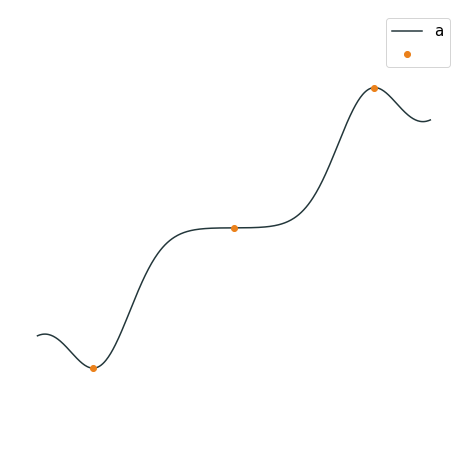

In [18]:
x = np.linspace(-4.4,4.4,500)
def fx(x):
    a = 3
    return 0.01 * x**3  + np.exp(-(x-a)**2) - np.exp(-(x+a)**2)
y = fx(x)
fig = plt.figure()
pointx = []
pointx.append(x[np.argmax(y)])
pointx.append(x[np.argmin(y)])
pointx.append(0.0)
pointy = [fx(i) for i in pointx]
plt.plot(x,y, zorder=1)
plt.scatter(pointx, pointy, c='#'+MCols['alert'], zorder=2)
plt.axis('off')

plt.xticks([])
plt.yticks([])
plt.xlim((-5,5))
plt.ylim((-2,2))
plt.savefig('1d_extrema.pdf')
plt.legend('a curve')
plt.show()

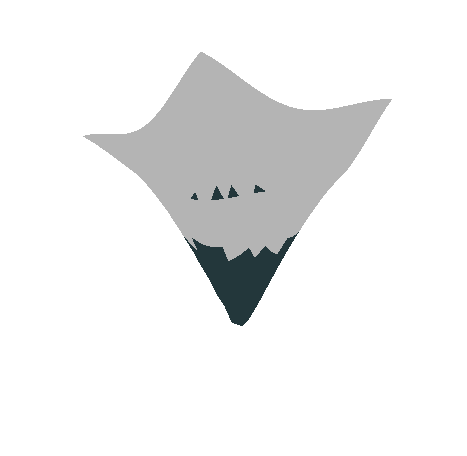

In [22]:
def HTMLColorToRGB(colorstring):
    """ convert #RRGGBB to an (R, G, B) tuple """
    colorstring = colorstring.strip()
    if colorstring[0] == '#': colorstring = colorstring[1:]
    if len(colorstring) != 6:
        raise ValueError("input #%s is not in #RRGGBB format" % colorstring)
    r, g, b = colorstring[:2], colorstring[2:4], colorstring[4:]
    r, g, b = [int(n, 16) for n in (r, g, b)]
    return (r, g, b)

def linear_cmap(rgb, rgbmax=(255, 255, 255), rgbmin=(0, 0, 0), N=100, cutoff=127):
    
    if (sum(rgb) / 3.0) < cutoff:
        r = np.linspace(rgb[0], rgbmax[0], N)
        g = np.linspace(rgb[1], rgbmax[1], N)
        b = np.linspace(rgb[2], rgbmax[2], N)        
    else:
        r = np.linspace(rgbmin[0], rgb[0],  N)
        g = np.linspace(rgbmax[1], rgb[1], N)
        b = np.linspace(rgbmax[2],rgb[2], N)
        
    return np.stack((r, g, b), axis=1) / 255.0

clist = linear_cmap(HTMLColorToRGB(MCols['dTeal']), rgbmax=(180, 180, 180), N=2)
cm = mpl.colors.ListedColormap(clist)


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X, Y = np.mgrid[-1:1:20j, -1:1:20j]
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

xnew, ynew = np.mgrid[-1:1:120j, -1:1:120j]
tck = interpolate.bisplrep(X, Y, Z, s=0)
znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

# Plot the surface.
#surf = ax.plot_surface(xnew, ynew, znew, cmap=cm,
#                       linewidth=0, antialiased=False, )

surf = ax.plot_surface(X, Y, Z, cmap=cm,
                       linewidth=0, antialiased=False, )

plt.axis('off')

plt.show()